# Notebook for OpenAIModelFlow 
In this example, we will show you how to generate question-answers (QAs) from give text strings using OpenAI's models via uniflow's [OpenAIJsonModelFlow](https://github.com/CambioML/uniflow/blob/main/uniflow/flow/model_flow.py#L87).

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation.

Next, you will need a valid [OpenAI API key](https://platform.openai.com/api-keys) to run the code. Once you have the key, set it as the environment variable `OPENAI_API_KEY` within a `.env` file in the root directory of this repository. For more details, see this [instruction](https://github.com/CambioML/uniflow/tree/main#api-keys)
### Update system path

In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

### Import dependency

In [2]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.flow.client import TransformClient
from uniflow.flow.flow_factory import FlowFactory
from uniflow.flow.config import TransformOpenAIConfig
from uniflow.viz import Viz
from uniflow.op.prompt import Context

load_dotenv()

/Users/goldpiggy/anaconda3/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

### List all available flows

In [3]:
FlowFactory.list()

{'extract': ['ExtractPDFFlow', 'ExtractTxtFlow'],
 'transform': ['TransformCopyFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow']}

### Prepare Sample Prompts
Here, we will use the following sample prompts from which to generate QAs.

In [5]:
raw_context_input = ["It was a sunny day and the sky color is blue.", "My name is bobby and I am a talent software engineer working on AI/ML."]

Next, for the given raw text strings `raw_context_input` above, we convert them to the `Context` class to be processed by `uniflow`.

In [6]:
data = [
    Context(context=c)
    for c in raw_context_input
]

### Use LLM to generate data
In this example, we use the `OpenAIConfig` defaults with the [OpenAIModelConfig](https://github.com/CambioML/uniflow/blob/main/uniflow/model/config.py#L17) to generate questions and answers.

In [7]:
config = TransformOpenAIConfig()
client = TransformClient(config)

Now we call the `run` method on the `client` object to execute the question-answer generation operation on the data shown above.

In [8]:
output = client.run(data)

100%|██████████| 2/2 [00:04<00:00,  2.24s/it]


### View the output

Let's take a look of the generated output.

In [9]:
output[0]['output'][0]

{'response': ['question: What is the color of the sky?\nanswer: blue.'],
 'error': 'No errors.'}

In [10]:
output[1]['output'][0]

{'response': ['question: What kind of work do you do as a software engineer?\nanswer: I work on AI/ML technology.'],
 'error': 'No errors.'}

## Plot model flow graph

In [11]:
graph = Viz.to_digraph(output[0]['root'])

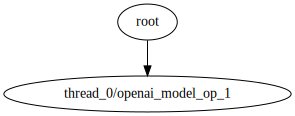

In [14]:
display(graph)

In [15]:
graph = Viz.to_digraph(output[1]['root'])

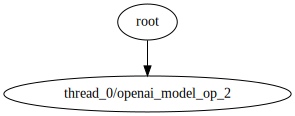

In [16]:
display(graph)